# Merkmal Korrelationen
## Allgemein


In [1]:
import pandas
import seaborn as sns
import os
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
# Lesen der Merkmale
featuresDf = pandas.read_csv("../daten/merkmale.csv")
featuresDf.describe()

,Zeitstempel,Breitengrad,Laengengrad,Geschwindigkeit,Messwerte,StartZeitfenster,StartBewegungsdaten,StartBelichtung,Belichtungszeit,MittelX,...,VarianzX,VarianzY,VarianzZ,VarianzNick,VarianzRoll,AbweichungX,AbweichungY,AbweichungZ,AbweichungNick,AbweichungRoll
count,4.983200e+04,49832.000000,49832.000000,49832.000000,49832.000000,4.983200e+04,4.983200e+04,4.983200e+04,4.983200e+04,49832.000000,...,49832.000000,49832.000000,49832.000000,49832.000000,49832.000000,49832.000000,49832.000000,49832.000000,49832.000000,49832.000000
mean,1.521224e+12,53.605875,10.124876,14.072868,19.367154,7.625330e+13,7.625324e+13,7.625334e+13,1.251697e+07,1.039408,...,3.883103,24.962929,39.812381,0.374660,0.621674,1.652709,4.056810,5.213922,0.552162,0.548176
std,7.284217e+07,0.028515,0.062429,3.577643,0.615640,3.231985e+13,3.231984e+13,3.231985e+13,7.872093e+06,0.662132,...,6.965085,49.019729,65.552239,0.338714,1.243568,1.073163,2.916401,3.553541,0.264156,0.566731
min,1.521124e+12,53.557396,10.002181,5.004000,6.000000,2.999506e+13,2.999499e+13,2.999509e+13,9.376720e+05,0.089458,...,0.012640,0.006250,0.066030,0.000690,0.000150,0.112430,0.079060,0.256960,0.026270,0.012250
25%,1.521128e+12,53.577670,10.072659,11.700000,19.000000,3.372892e+13,3.372885e+13,3.372895e+13,7.528958e+06,0.598467,...,0.879678,4.812448,7.693005,0.118540,0.027678,0.937910,2.193730,2.773625,0.344300,0.166363
50%,1.521212e+12,53.613132,10.140025,14.292000,19.000000,7.307148e+13,7.307141e+13,7.307151e+13,1.000184e+07,0.870627,...,1.914450,10.709740,17.597280,0.268690,0.088170,1.383635,3.272575,4.194910,0.518350,0.296930
75%,1.521297e+12,53.626503,10.162369,16.631998,20.000000,1.080197e+14,1.080196e+14,1.080197e+14,2.000368e+07,1.287063,...,4.265810,24.578618,42.988410,0.537238,0.554593,2.065380,4.957685,6.556550,0.732965,0.744712
max,1.521302e+12,53.656776,10.229659,24.804000,48.000000,1.122372e+14,1.122371e+14,1.122372e+14,3.287369e+07,10.997221,...,274.079180,990.233590,1172.286260,3.329020,18.654280,16.555340,31.467980,34.238670,1.824560,4.319060


In [3]:
# Gibt die Spaltennamen aus
featuresDf.columns

Index(['Zeitstempel', 'Breitengrad', 'Laengengrad', 'Geschwindigkeit',
       'AccelerometerX', 'AccelerometerY', 'AccelerometerZ', 'Azimuth', 'Nick',
       'Roll', 'SensorZeitstempel', 'Messwerte', 'StartZeitfenster',
       'StartBewegungsdaten', 'StartBelichtung', 'Belichtungszeit', 'MittelX',
       'MittelY', 'MittelZ', 'MittelNick', 'MittelRoll', 'AzimuthAenderung',
       'VarianzX', 'VarianzY', 'VarianzZ', 'VarianzNick', 'VarianzRoll',
       'AbweichungX', 'AbweichungY', 'AbweichungZ', 'AbweichungNick',
       'AbweichungRoll'],
      dtype='object')

## Geografische Koordinaten

### Einleitung
Durch einem matplotlib scatter plot kann die Beziehung von Längengrad zu Breitengrad dargestellt werden.   
Dies veranschaulicht die geografischen Koordinaten der erfassten Daten. Sobald die Belichtungszeit einer Aufnahme   
startet wird die letzte erfasste GPS Position abgespeichert. Der alpha Wert der Blauen Farbe gibt die Dichte von GPS Postionen an.

### Erwartung
Die GPS Koordinaten werden mit unterschiedlicher Häufigkeit erfasst. Dies hat mehrere Gründe. Bei einer geringen Geschwindikeit auf einem Weg   
werden die Koordinaten häufiger abgefragt als mit einer hohen Geschwindikeit, weil in einer kürzeren Zeit mehr Distanz zurückgelegt wird.   
Desweiteren werden Daten nur erfasst, wenn die Geschwindigkeit zwischen 5 km/h und 25 km/h liegt. Auf einer Wegstrecke   
kann es vorkommen, dass der Benutzer der Android App die Datenerfassung gestoppt hat oder die Anwendung abgestürzt ist.   
Nachdem das Smartphone in den Ruhemodus gekommen ist. Da der Nutzer inaktiv war wird die Erfassung der Daten auch pausiert.      
TODO Verweis das GPS koordinaten ungenau sind

### Ergebnis

Siehe Plot "GPS Koordinaten".

### Auswertung

Text(0.5,1,'GPS Koordinaten')

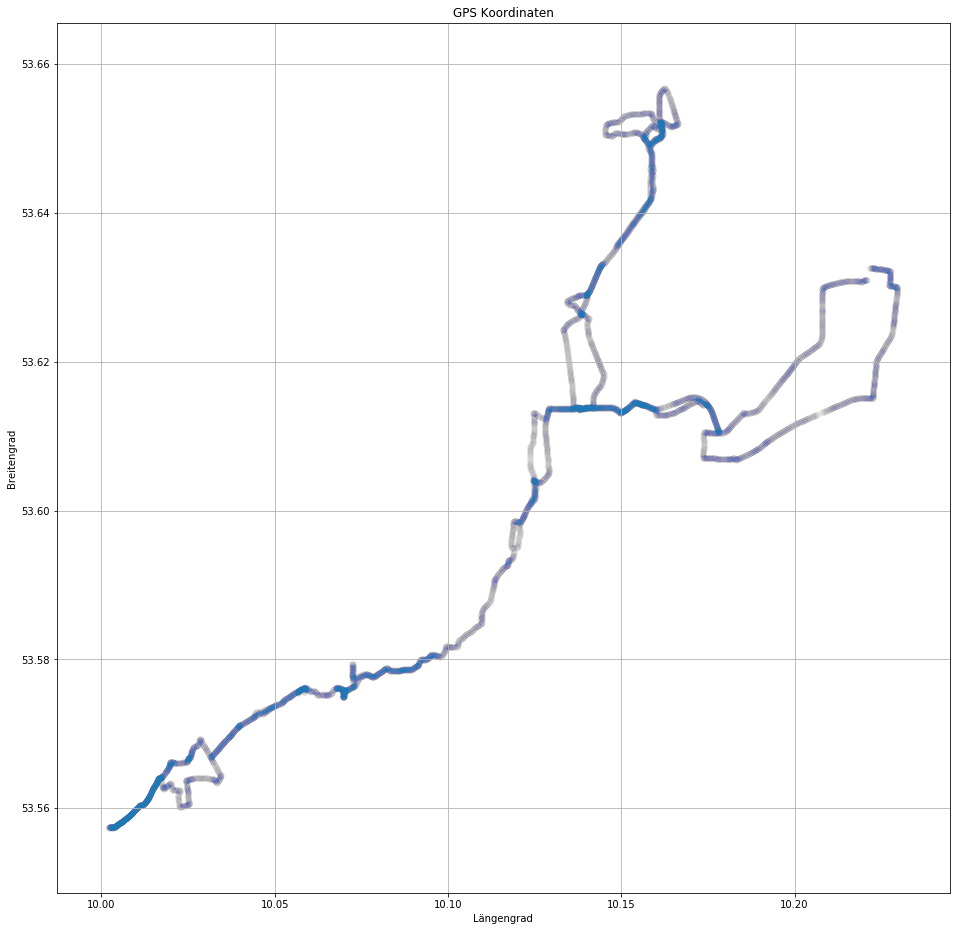

In [157]:
fig = plt.figure(figsize=(16,16))
ax  = fig.add_subplot(111)
ax.scatter(featuresDf['Laengengrad'], featuresDf['Breitengrad'], alpha = 0.002)
plt.xlabel('Längengrad')
plt.ylabel('Breitengrad')
plt.grid()
ax.set_title("GPS Koordinaten")

## Übersicht von Korrelationen

### Einleitung 

Die folgenden Plots bieten eine Übersicht über die Beziehungen der Merkmale zueinander.

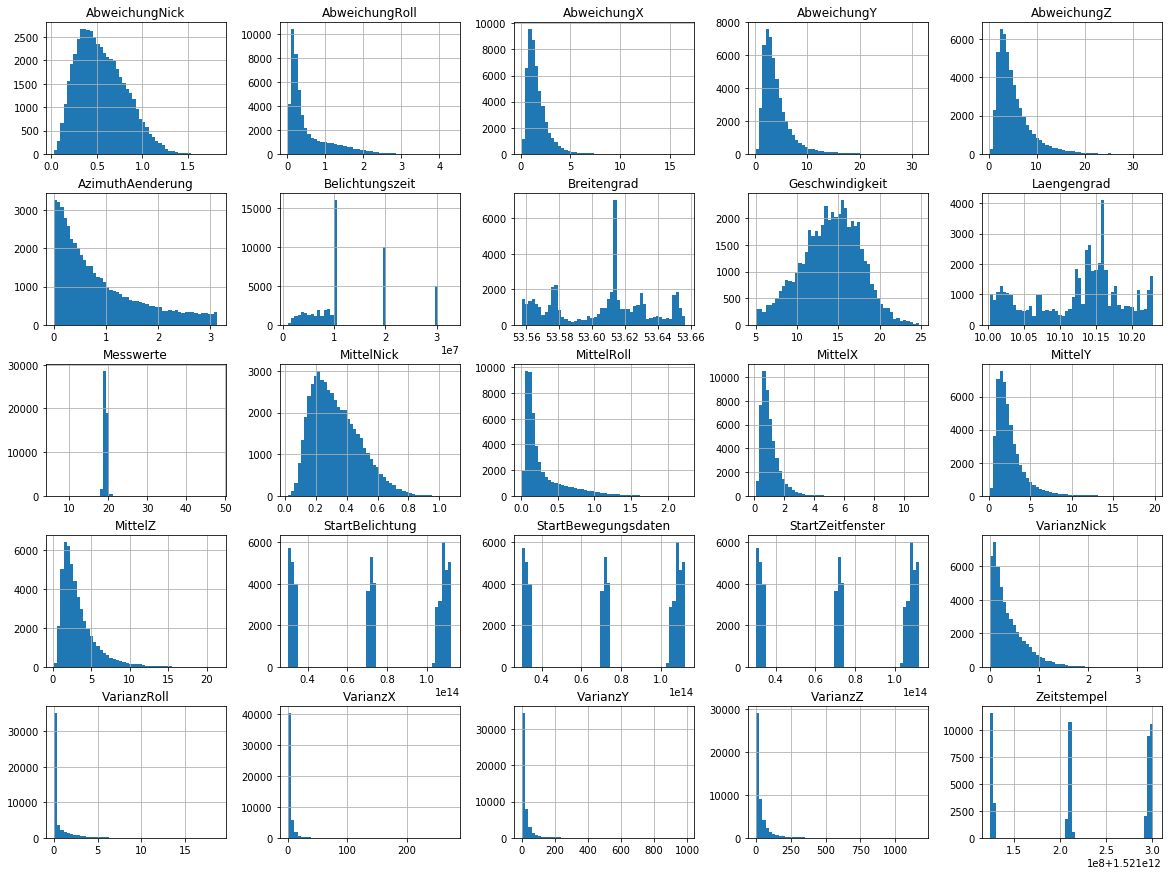

In [158]:
# Als Histogramdiagramm werden alls Merkmale dargestellt. 
# Dadurch ist ein erster Eindruck über den Wertereich der Daten möglich
featuresDf.hist(bins=50, figsize=(20,15))
plt.show()

In [159]:
accDf = featuresDf[['AccelerometerX','AccelerometerY','AccelerometerZ','MittelX','MittelY','MittelZ'
                   ,'VarianzX','VarianzY','VarianzZ','AbweichungX','AbweichungY','AbweichungZ']]
accDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49832 entries, 0 to 49831
Data columns (total 12 columns):
AccelerometerX    49832 non-null object
AccelerometerY    49832 non-null object
AccelerometerZ    49832 non-null object
MittelX           49832 non-null float64
MittelY           49832 non-null float64
MittelZ           49832 non-null float64
VarianzX          49832 non-null float64
VarianzY          49832 non-null float64
VarianzZ          49832 non-null float64
AbweichungX       49832 non-null float64
AbweichungY       49832 non-null float64
AbweichungZ       49832 non-null float64
dtypes: float64(9), object(3)
memory usage: 4.6+ MB


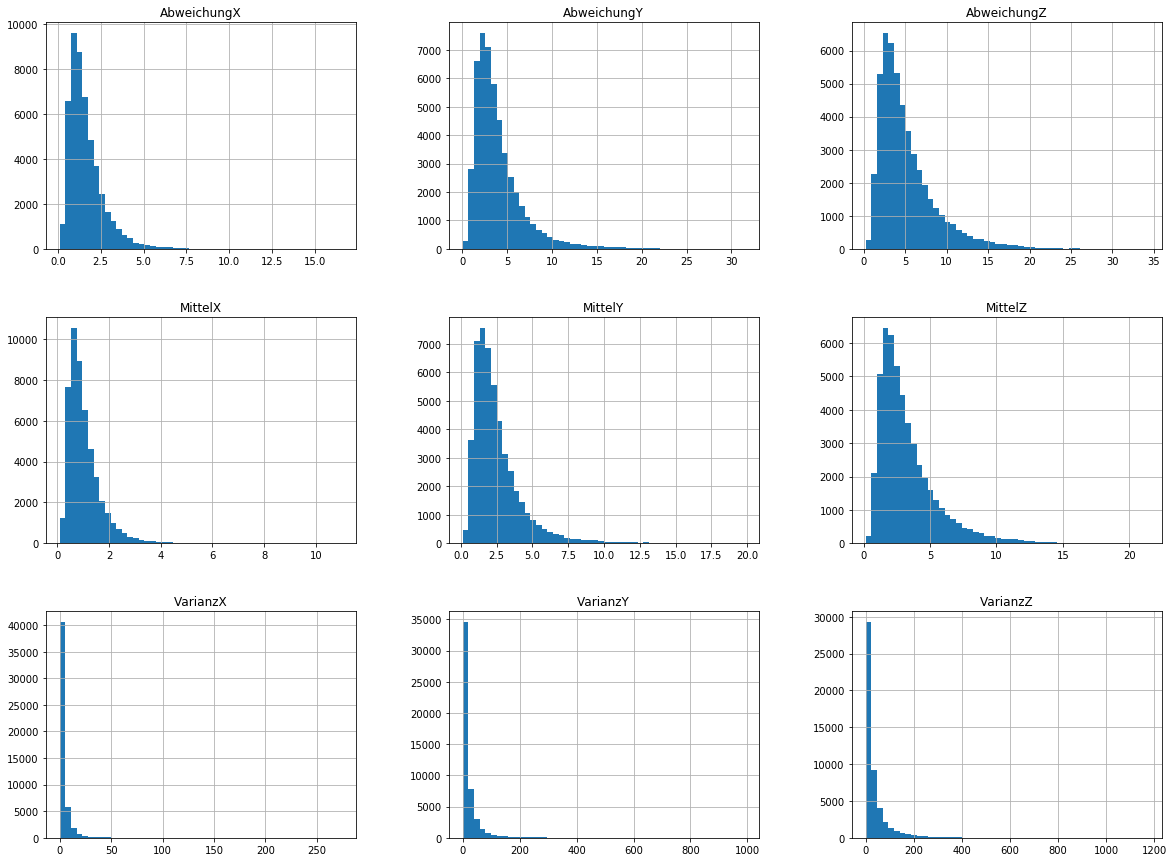

In [160]:
accDf.hist(bins=50, figsize=(20,15))
plt.show()

### Seaborn pairplot

Mit der Seaborn Funktion pairplot können Variablen gegenübergestellt werden. Dies ist interessant,um einen      
ersten Überblick zu bekommen. In jeder Reihe des Gitter-Plots wird eine Variable geplottet und mit    
den anderen Variablen in dem Spalten des Rasters gegenübergestellt.    
Dabei werden die Diagonalen Achsen als Blockdiagramm dargestellt, welche das Verteilungsverhältnis der    
einzelnen Variablen zeigt.  

### Einleitung Beschleunigungssensordaten

In den folgenden Diagrammen wird die Geschwindigkeit gegen die berechneten Merkmale aus den Beschleunigungssensordaten der X, Y und   
Z-Achse innerhalb eines Zeitfensters dargestellt. Berechnet wurden der Mittelwert, Varianz und Standardabweichung der Achsen.    

### Erwartung

Erwartet wird das der Mittelwert, Varianz und Standardabweichung mit zunehmender Geschwindigkeit tendenziell auch zunimmt.   
Eine Abweichung dieser Annahme müsste sich durch verschiedene Oberflächenqualitäten des Weges ergeben. Eine Wegstrecke mit   
vielen Unebenheiten müsste relativ hohe Werte ergeben auch bei einer geringen Geschwindikeit.  


### Ergebnis

Siehe Diagramme.

### Auswertung

Mit 49832 Merkmalen die 

In [161]:
featuresDf.shape

(49832, 32)

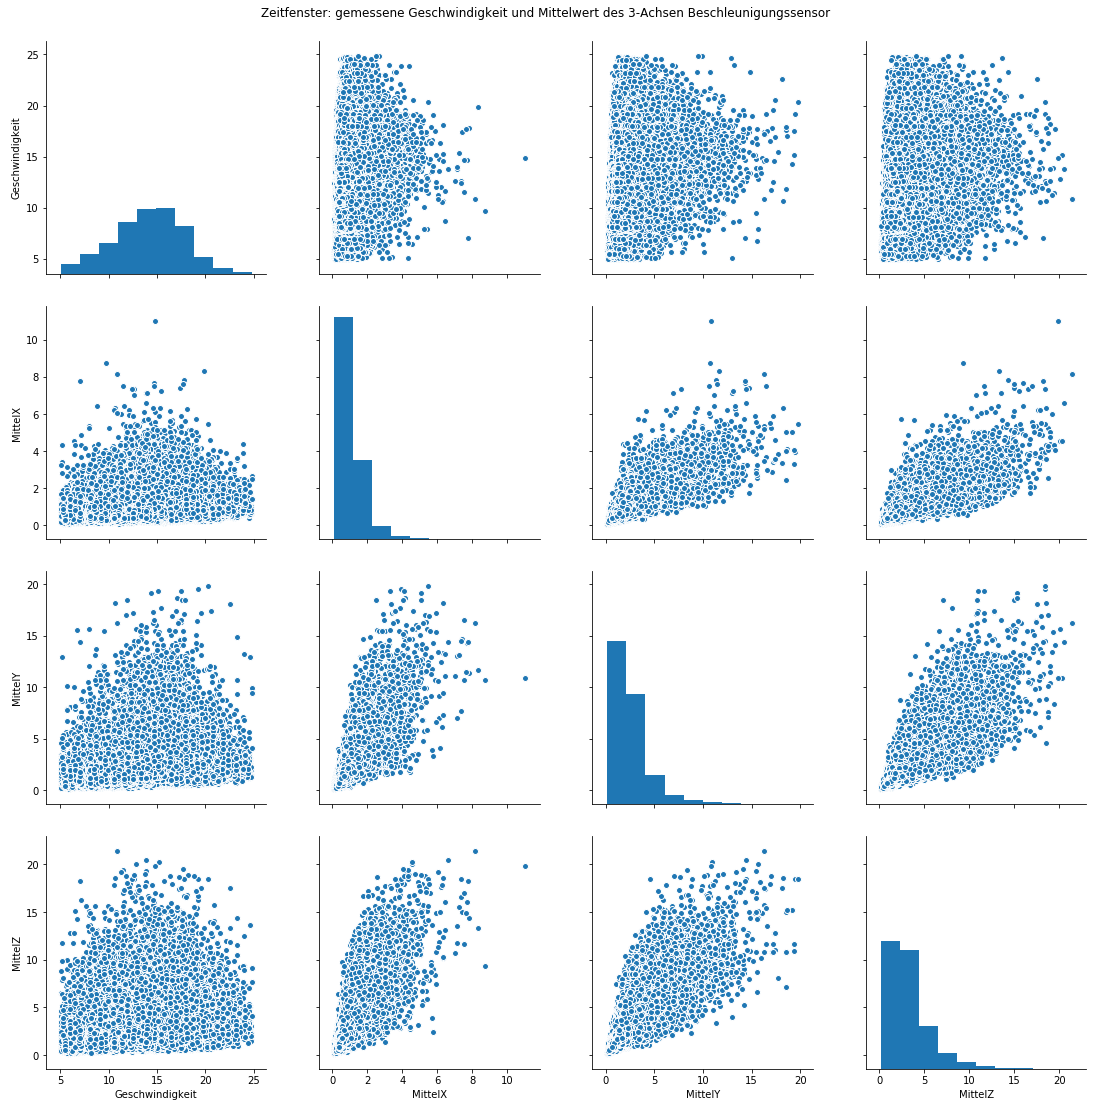

In [162]:
# Die Geschwindigkeit wird den Mittelwert der Beschleunigungssensordaten X,Y,Z gegenübergestellt.
# Hier werden auch die Mittelwerte miteinander geplottet.
g = sns.pairplot(featuresDf[['Geschwindigkeit','MittelX','MittelY','MittelZ']])
g.fig.set_size_inches(16,16)
plt.subplots_adjust(top=0.95)
g.fig.suptitle("Zeitfenster: gemessene Geschwindigkeit und Mittelwert des 3-Achsen Beschleunigungssensor")
g.savefig("Zeitfenster_geschwindigkeit_mittelwert_3-Achsen-Beschleunigungssensor_mit_abs.png")

Text(0.5,0.98,'Zeitfenster: gemessene Geschwindigkeit und Mittelwert der Z-Achse des Beschleunigungssensor')

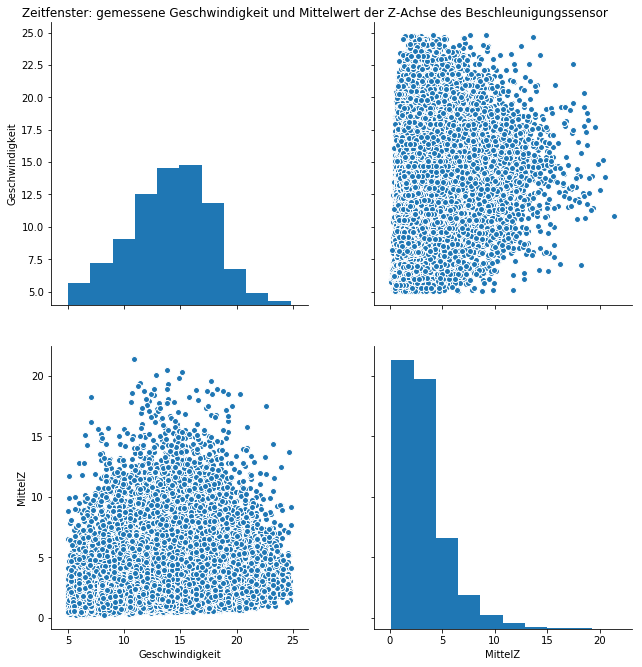

In [4]:
# Geschwindigkeit und Mittelwert der Beschleunigungssensor Z-Achsen Messwerte eines Zeitfensters
g = sns.pairplot(featuresDf[['Geschwindigkeit','MittelZ']])
g.fig.set_size_inches(10,10)
g.fig.suptitle("Zeitfenster: gemessene Geschwindigkeit und Mittelwert der Z-Achse des Beschleunigungssensor")

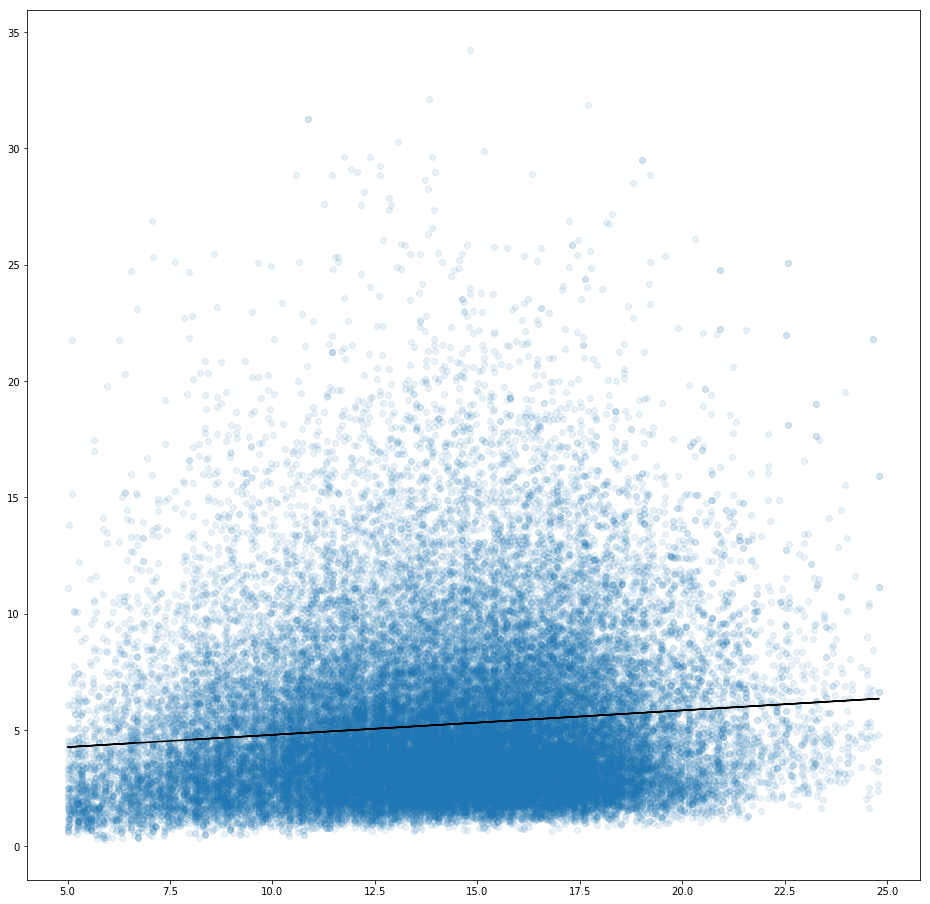

In [11]:
from scipy.stats import linregress
plt.figure(figsize=(16,16))
slope, intercept, r_value, p_value, std_err = linregress(featuresDf['Geschwindigkeit'],featuresDf['AbweichungZ']) 
plt.scatter(featuresDf['Geschwindigkeit'],featuresDf['AbweichungZ'], label='original data', alpha = 0.1)
plt.plot(featuresDf['Geschwindigkeit'], intercept + slope*featuresDf['Geschwindigkeit'], 'k', label='fitted line')

In [12]:
slope

0.105101851231941

Text(0.5,0.98,'Zeitfenster: gemessene Geschwindigkeit und Varianz der Z-Achse des Beschleunigungssensor')

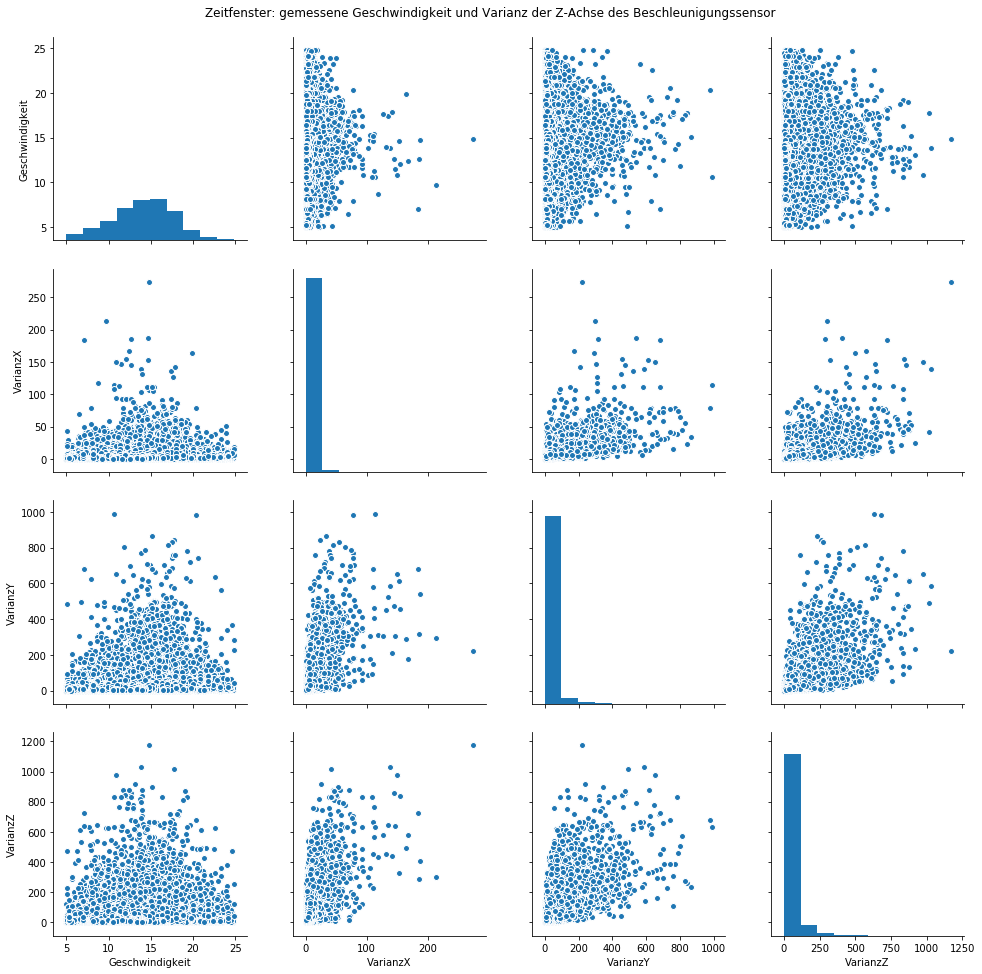

In [165]:
g = sns.pairplot(featuresDf[['Geschwindigkeit','VarianzX','VarianzY','VarianzZ']])
g.fig.set_size_inches(14,14)
plt.subplots_adjust(top=0.95)
g.fig.suptitle("Zeitfenster: gemessene Geschwindigkeit und Varianz der Z-Achse des Beschleunigungssensor")

Text(0.5,0.98,'Zeitfenster: gemessene Geschwindigkeit und Standardabweichung der Z-Achse des Beschleunigungssensor')

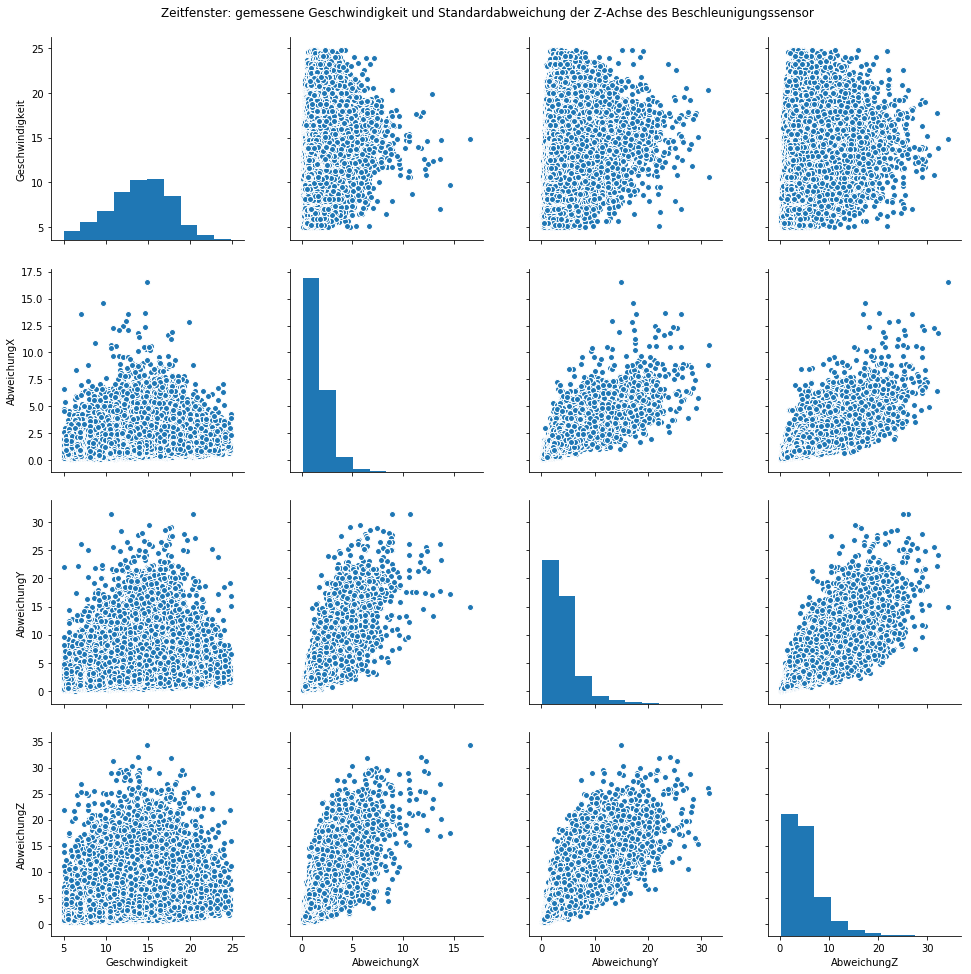

In [166]:
# Standardabweichung der Beschleunigungsensorachsen
g = sns.pairplot(featuresDf[['Geschwindigkeit','AbweichungX','AbweichungY','AbweichungZ']])
g.fig.set_size_inches(14,14)
plt.subplots_adjust(top=0.95)
g.fig.suptitle("Zeitfenster: gemessene Geschwindigkeit und Standardabweichung der Z-Achse des Beschleunigungssensor")

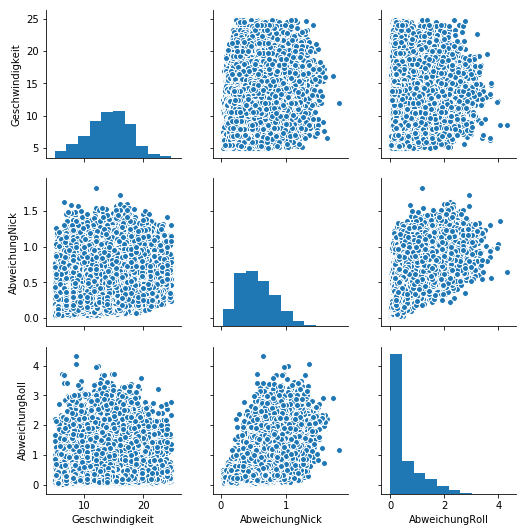

In [168]:
sns.pairplot(featuresDf[['Geschwindigkeit','AbweichungNick','AbweichungRoll']])

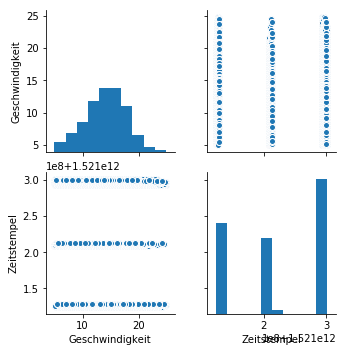

In [16]:
# Azimuth gibt die Winkeländerung in Rad an von Start der Datenerfassung bis zum Stopp dieser. 
sns.pairplot(featuresDf[['Geschwindigkeit','Azimuth','Zeitstempel']])

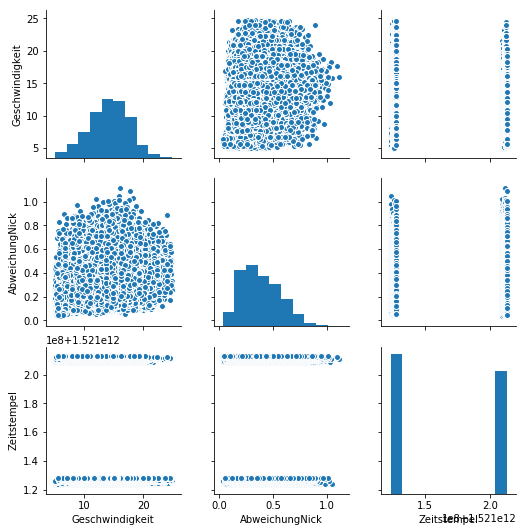

In [19]:
sns.pairplot(featuresDf[['Geschwindigkeit','AbweichungNick','Zeitstempel']])

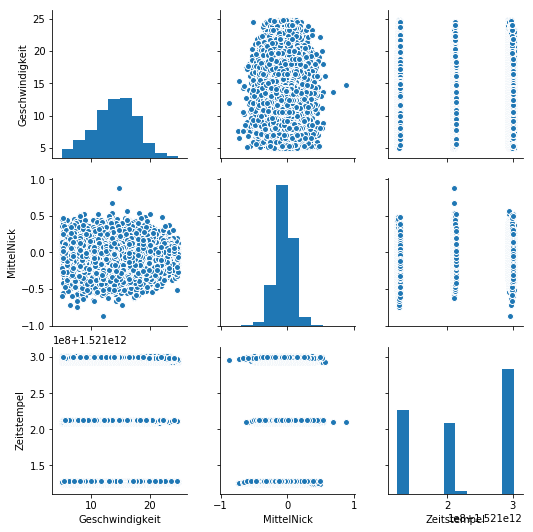

In [17]:
sns.pairplot(featuresDf[['Geschwindigkeit','MittelNick','Zeitstempel']])

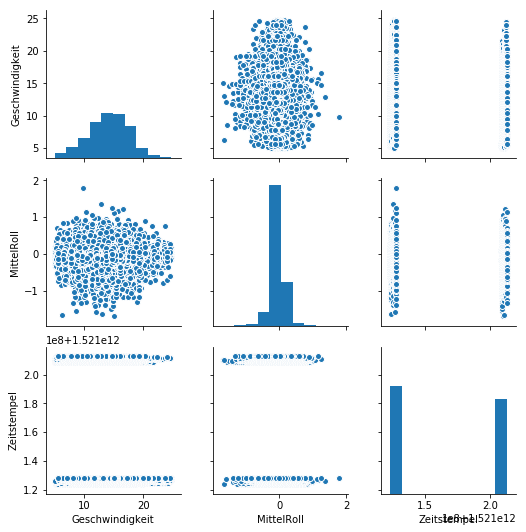

In [21]:
sns.pairplot(featuresDf[['Geschwindigkeit','MittelRoll','Zeitstempel']])

In [18]:
# Zusammenhänge werden berechnet mit der Person Methode
corrMatrix = featuresDf.corr()
corrMatrix['Geschwindigkeit'].sort_values()

Klasse                -0.223148
StartBewegungsdaten   -0.074102
StartZeitfenster      -0.074102
StartBelichtung       -0.074102
Zeitstempel           -0.068938
Breitengrad           -0.040657
Belichtungszeit       -0.025924
Messwerte             -0.009738
MittelRoll            -0.005320
MittelNick            -0.003962
MittelZ               -0.002272
MittelX                0.000383
MittelY                0.004991
Laengengrad            0.034331
AzimuthAenderung       0.049205
VarianzX               0.059229
VarianzRoll            0.060914
VarianzZ               0.068177
AbweichungRoll         0.082290
VarianzY               0.091440
AbweichungZ            0.095563
AbweichungX            0.106374
VarianzNick            0.129509
AbweichungY            0.135355
AbweichungNick         0.145141
Geschwindigkeit        1.000000
Name: Geschwindigkeit, dtype: float64

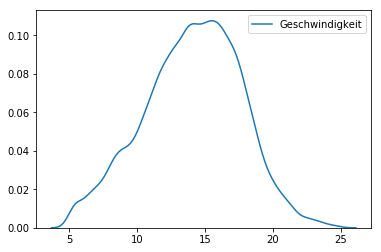

In [169]:
sns.kdeplot(featuresDf['Geschwindigkeit'])

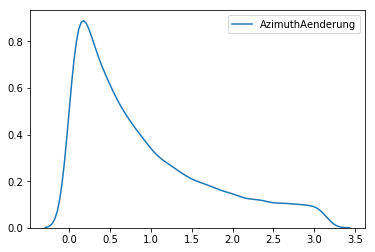

In [20]:
sns.kdeplot(featuresDf['AzimuthAenderung'])

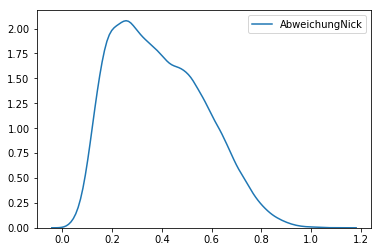

In [21]:
sns.kdeplot(featuresDf['AbweichungNick'])

C:\Users\morro\AppData\Local\conda\conda\envs\bachelor\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


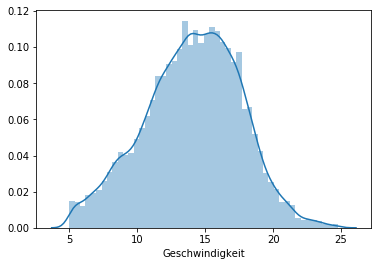

In [22]:
sns.distplot(featuresDf['Geschwindigkeit'])

C:\Users\morro\AppData\Local\conda\conda\envs\bachelor\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


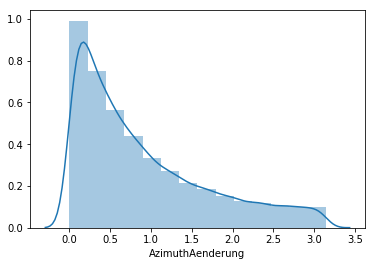

In [23]:
sns.distplot(featuresDf['AzimuthAenderung'],  bins=14)

C:\Users\morro\AppData\Local\conda\conda\envs\bachelor\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


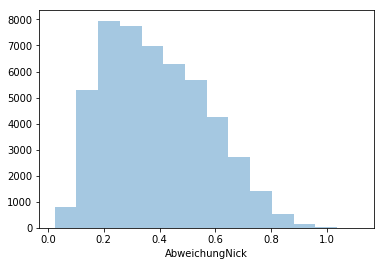

In [24]:
sns.distplot(featuresDf['AbweichungNick'], bins=14, kde=False)